In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_rows', 20)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 3)
plt.rcParams['font.family'] = 'sans-serif'

# 第 1 章：介紹及檢視資料集

資料分析的第一步，通常將透過工具取得的資料數據檔案給載入，並且先簡單的瀏覽一下數據，確認檔案是否有損毀、數據是否有錯誤、格式是否正確、數據是否合理⋯⋯等等。

接下來的課程將介紹我們在整個課程中使用的範例資料集，以及簡單地觀察資料。

## 範例資料集介紹：行政院環保署空氣品質測站歷年監測資料

這次為了讓各位熟悉分析工具，我們找了行政院環保署提供的空氣品質監測資料，作為給各位練習的範例資料集。

由於資料集包含**名目 (Nominal) 尺度**以及**比例 (Ratio) 尺度**的資料，加上選擇的地區就是我們正在上課的地點，希望讓各位在處理資料的時候，可以實際體驗到資料分析工作可能會遇到的狀況並依此練習，也可以在生活中找到資料科學應用的場景。

### 資料集簡介

* 主題：空氣品質測站歷年監測資料
* 資料來源：https://taqm.epa.gov.tw/taqm/tw/YearlyDataDownload.aspx
* 地點：台灣雲林麥寮
* 年份：2017 年
* 資料收集頻率：每天 24 筆監測數據，共 8760 筆
* 原始檔案中共有 19 個 columns，包含 1 column 的監測時間資料，18 columns 的監測項目資料
* 監測時間說明：`datetime` type

> 備註：
>
> 這裡所謂的原始資料，為講師在上課前已經執行部分預處理 (Preprocessing) 後的資料，若各位有興趣查看「真正」的原始資料（也就是未處理過的檔案）的狀況，請自行訪問資料來源網站並獲得資料集。


### 資料預覽


| 測項1 | 測項2 | 測項3 |
--- | --- | --- |
2017-01-01 00:00:00 | | | |
2017-01-01 01:00:00 | | | |
2017-01-01 02:00:00 | | | |
... | | | |
2017-01-01 23:00:00 | | | |


### 監測項目說明

測項簡稱 | 單位 | 測項名稱
--- | --- | ---
SO2 | ppb | 二氧化硫
CO | ppm | 一氧化碳
O3 | ppb | 臭氧
PM10 | μg/m<sup>3</sup> | 粒徑小於等於十微米 (μm) 之懸浮微粒
PM2.5 | μg/m<sup>3</sup> | 粒徑小於等於二‧五微米 (μm) 之懸浮微粒
NOX | ppb | 氮氧化物。所有含氮的氧化物的化學物質通稱為氮氧化物 (NOx)。當燃燒工序以高溫進行時，例如發電廠及汽車引擎操作時，這等氣體便會形成，排放入大氣中。
NO | ppb | 一氧化氮。燃燒過程中所產生的主要的NOx，也可轉化為二氧化氮。
NO2 | ppb | 二氧化氮。腐蝕性高和氧化能力強的淺啡色氣體，濃度高時會含刺激性酸味。在陽光下生成臭氧。 市區霞氣或光化學霧的主要成分。
THC | ppm | 總碳氫合物
NMHC | ppm | 非甲烷碳氫化合物
CH4 | ppm | 甲烷
UVB | UVI | 紫外線指數
AMB_TEMP | ℃ | 大氣溫度
RAINFALL | mm | 雨量
RH | % | 相對溼度
WIND_SPEED | m/sec | 風速（以每小時最後 10 分鐘算術平均）
WIND_DIREC | degress | 風向（以每小時最後 10 分鐘向量平均）
WS_HR | m/sec | 風速小時值（以整個小時算術平均）
WD_HR | degress | 風向小時值（以整個小時向量平均）
PH_RAIN | pH | 酸鹼值（酸雨）
RAIN_COND | μS/cm | 導電度（酸雨）

* 單位說明：
    * μg/m<sup>3</sup>：微克／立方公尺
    * ppm：體積濃度百萬分之一
    * ppb：體積濃度十億分之一

## `read_csv()`：讀取 CSV 資料檔案

[CSV 檔案](https://zh.wikipedia.org/zh-tw/逗號分隔值)是一種常見的資料類型，比起 Microsoft Excel 或是其他試算表工具的專用格式，CSV 檔案顯得相當容易維護，且檔案容量相對其他格式顯得較小，在傳送時也相當方便，是我們相當推薦的格式。讀取時只要調用 `read_csv()` function 即可。

常用 Parameters : 

1. `filepath_or_buffer` : 路徑名稱
1. `parse_dates` : 將欲轉成  `datetime` 格式的 column 放入 list，預設為 `False`
1. `index_col` : 欲設定成 index 的 column，預設為 `None`

一般的試算表應用程式或是資料分析程式都有支援輸出資料檔案為 CSV 檔案的功能。如果還是有讀取 Excel 檔案的需求，也可以選擇調用 `read_excel()`（需要事先安裝 [`xlrd` 套件](https://pypi.org/project/xlrd/)）function 來完成。

讀取檔案時需要指定路徑及檔案名稱，這裡我們會利用 Python 內建的 `os` Library 裡的 function 來輔助。主要是可以避免在不同平台時可能會有路徑格式不同的問題，這時就建議使用 `os.path.join()` function 來標示完整路徑。

參考文件：

* [pandas.read_csv()](http://pandas.pydata.org/pandas-docs/stable/io.html#io-read-csv-table)
* [pandas.read_excel()](http://pandas.pydata.org/pandas-docs/stable/io.html#io-excel-reader)
* [10 minutes to pandas | Getting Data In/Out](http://pandas.pydata.org/pandas-docs/stable/10min.html#getting-data-in-out)
* [IO Tools (Text, CSV, HDF5, …)](http://pandas.pydata.org/pandas-docs/stable/io.html)
* [os.path.join](https://docs.python.org/3/library/os.path.html#os.path.join)

In [3]:
# 指定檔案位置，包含完整路徑以及檔案名稱
# os.curdir: 回傳目前目錄的路徑
AQI_FILEPATH = os.path.join(os.curdir, 'data', 'aqi.csv')

# 檢視檔案位置
print(AQI_FILEPATH)

./data/aqi.csv


In [4]:
# 讀取 CSV 檔案，並將其指定為名稱是 df (DataFrame) 的物件
df = pd.read_csv(filepath_or_buffer=AQI_FILEPATH, parse_dates=['datetime'], index_col='datetime')
df_bak = df.copy()

# 使用 head() method 大略地瀏覽資料
df.head()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
datetime,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,20.0,2.0,0.20,0.04,1.7,7.5,9.2,25.0,67.0,18.0,NR,88.0,1.5,2.0,33.0,37.0,1.4,0.1
2017-01-01 01:00:00,20.0,2.2,0.19,0.05,1.9,7.9,9.8,18.0,52.0,14.0,NR,88.0,2.1,2.2,76.0,143.0,0.5,0.6
2017-01-01 02:00:00,19.0,2.2,0.24,0.08,2.0,9.3,11.0,13.0,59.0,17.0,NR,89.0,2.0,2.3,140.0,142.0,0.5,0.6
2017-01-01 03:00:00,19.0,2.4,0.24,0.11,1.4,9.5,11.0,8.5,53.0,24.0,NR,90.0,1.8,2.5,107.0,51.0,0.5,0.4
2017-01-01 04:00:00,18.0,3.4,0.23,0.12,6.8,11.0,17.0,1.8,37.0,25.0,NR,90.0,1.7,3.6,96.0,106.0,1.0,0.5


In [5]:
df.tail()

,AMB_TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RAINFALL,RH,SO2,THC,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR
datetime,,,,,,,,,,,,,,,,,,
2017-12-31 19:00:00,17.0,2.0,0.57,0.11,0.9,16.0,17.0,25.0,88.0,53.0,NR,73.0,3.8,2.1,11.0,11.0,5.6,5.6
2017-12-31 20:00:00,17.0,2.0,0.53,0.10,0.9,18.0,19.0,23.0,82.0,48.0,NR,73.0,4.8,2.1,11.0,11.0,4.5,5.0
2017-12-31 21:00:00,17.0,1.9,0.49,0.09,0.9,17.0,18.0,25.0,91.0,44.0,NR,73.0,4.3,2.0,12.0,14.0,3.8,4.6
2017-12-31 22:00:00,17.0,1.9,0.46,0.08,0.9,20.0,21.0,21.0,82.0,41.0,NR,72.0,6.0,2.0,14.0,15.0,4.2,4.0
2017-12-31 23:00:00,17.0,1.9,0.45,0.06,1.0,20.0,21.0,21.0,77.0,35.0,NR,70.0,6.8,2.0,16.0,19.0,3.8,3.9


In [6]:
# 使用內建的 type() function 來確認讀取後的物件類型
# https://docs.python.org/3/library/functions.html#type
type(df)

pandas.core.frame.DataFrame

In [7]:
# 檢視資料 DataFrame 的索引的物件類型
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [8]:
s = df['PM2.5']
type(s)

pandas.core.series.Series

In [9]:
string = 'Hello World!'
type(string)

str

## 資料初探

### 名詞解釋：欄 (Column) 與列 (Row)

下表由縱向來看，日期為**索引 (Index)**，而 `AMB_TEMP`, `CH4`, `CO`, `NMHC` 則稱為排或是**欄 (Column)**，所以這個表格中總共有 4 個 Column。

而由橫向來看時，每一**列 (Row)** 為一筆資料。

| AMB_TEMP | CH4 | CO | NMHC
--- | ---
2017-01-01 00:00:00 | 20.0 | 2.0 | 0.20 | 0.04
2017-01-01 00:00:00 | 20.0 | 2.2 | 0.19 | 0.05
2017-01-01 00:00:00 | 19.0 | 2.2 | 0.24 | 0.08


> [NOTE] 若各位之後有機會閱讀中國大陸的文件，他們在稱呼欄與列時，與我們的方向是相反的。
> 
> 因為怕各位混淆，往後我們在觀察資料時，將直接標註為 Column 或 Row，不再使用中文稱呼。
>
> 也因為基於翻譯在不同的地區、作者可能會有不同的中文名詞，我們也會儘量使用原始的英文名詞來描述。

### 檢視特定欄位的資料

接著我們簡單示範一下如何觀察剛才載入的部分資料。

In [10]:
# 取得某一個 column 名稱的資料
# 舉例說明：取得 PM2.5（Column 名稱：'PM2.5'）的資料
df['PM2.5']

datetime
2017-01-01 00:00:00    18.0
2017-01-01 01:00:00    14.0
2017-01-01 02:00:00    17.0
2017-01-01 03:00:00    24.0
2017-01-01 04:00:00    25.0
2017-01-01 05:00:00    28.0
2017-01-01 06:00:00    33.0
2017-01-01 07:00:00    36.0
2017-01-01 08:00:00    41.0
2017-01-01 09:00:00    46.0
                       ... 
2017-12-31 14:00:00    95.0
2017-12-31 15:00:00    95.0
2017-12-31 16:00:00    94.0
2017-12-31 17:00:00    82.0
2017-12-31 18:00:00    64.0
2017-12-31 19:00:00    53.0
2017-12-31 20:00:00    48.0
2017-12-31 21:00:00    44.0
2017-12-31 22:00:00    41.0
2017-12-31 23:00:00    35.0
Name: PM2.5, Length: 8760, dtype: float64

In [11]:
# 取得多個 columns 的資料
# 舉例說明：取得臭氧、PM2.5、二氧化硫（Column 名稱：'O3', 'PM2.5', 'SO2'）的資料
df[['O3', 'CH4', 'PM10']].head()

,O3,CH4,PM10
datetime,,,
2017-01-01 00:00:00,25.0,2.0,67.0
2017-01-01 01:00:00,18.0,2.2,52.0
2017-01-01 02:00:00,13.0,2.2,59.0
2017-01-01 03:00:00,8.5,2.4,53.0
2017-01-01 04:00:00,1.8,3.4,37.0


還有許多的方法可以瀏覽資料，我們將在之後的章節一一說明。

## 資料視覺化初探

將數值類型的資料畫成圖表，在檢視資料時也是相當好用的工具。

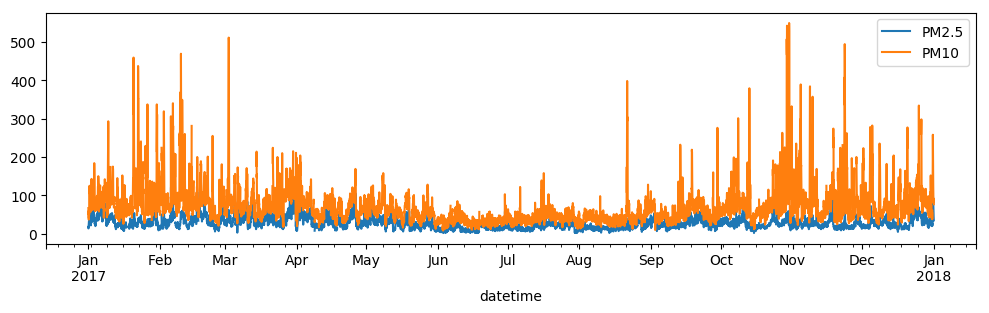

In [12]:
# 取得某一個 column 資料，利用 dataframe 的 methods plot() 將資料轉成圖表
# 舉例說明：取得 PM2.5 （Column 名稱：'PM2.5'）的資料，並轉成折線圖表
df[['PM2.5', 'PM10']].plot()

除了**折線圖**以外，Pandas 還提供了不同的圖表類型可供選擇，之後的章節也會說明。